<a href="https://colab.research.google.com/github/mkane968/Text-Mining-Experiments/blob/main/Experiments_in_Part_of_Speech_Tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiments in Part of Speech Tagging

This tutorial will walk through methods of POS tagging in NLTK and spaCy and visualization in NLTK, spaCy, and PosTagVisualizer...


Sources: 

*   NLTK Book
*   spaCy 101 tutorial
*   https://www.scikit-yb.org/en/latest/api/text/postag.html 
*   https://www.machinelearningplus.com/spacy-tutorial-nlp/
*   https://medium.com/analytics-vidhya/part-of-speech-tagging-what-when-why-and-how-9d250e634df6
*   https://stackabuse.com/python-for-nlp-parts-of-speech-tagging-and-named-entity-recognition/
Code from Nichole Nomura and JD Porter (cited below)

UD Pipe: https://corpy.readthedocs.io/en/stable/guides/udpipe.html 

https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/ 
https://www.dataknowsall.com/pos.html 

https://www.freecodecamp.org/news/an-introduction-to-part-of-speech-tagging-and-the-hidden-markov-model-953d45338f24/ 

Types of POS Tagging: https://www.tutorialspoint.com/natural_language_processing/natural_language_processing_part_of_speech_tagging.htm 

Packages and usages, relations to dependency grammar: https://devopedia.org/part-of-speech-tagging 
More background: https://www.analyticsvidhya.com/blog/2021/03/parts-of-speech-tag-and-dependency-grammer/ 

Can train own model: https://dh.fbk.eu/research/tint/the-pipeline/part-of-speech-tagging/ 

Tutorial: https://curriculum.dhinstitutes.org/workshops/text-analysis/lessons/?page=15 


Applications of POS Tagging: 
Word Sense Disambiguation (determining POS of keywords)
How words are being used in a corpus (i.e. what adjectives are being used to describe customer products, what verbs are being used in strong academic essays)
AI/Speech generators
Text cleaning
Examples of grammatical or lexical patterns: https://www.sketchengine.eu/blog/pos-tags/ 
Translation
Comparative analysis 

Outline of POS Tagging Notebook

Introductory text block: What is POS tagging? What are its usages? 
Table of Contents: POS Tagging with NLTK , POS Tagging with SpaCy, POS Visualization with PosTagVisualizer, POS Analysis with MDW, POS Analysis of Specific POS (Sentiment), POS Analysis Word Sense Disambiguation

In [ ]:
##NLTK Packages and Corpora
import nltk
from nltk.corpus import brown
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
import os
from nltk.tree import Tree
from IPython.display import display
nltk.download('treebank')
nltk.download('punkt')

#spaCy Packages and Corpora
import spacy
from spacy import displacy
from spacy.matcher import Matcher

#PosTagVisualizer Packages
from yellowbrick.text import PosTagVisualizer

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##Part of Speech Tagging with NLTK

NLTK enables the labeling of all words in a text according to their part of speech. Here we'll tag text from the Brown corpus (including stop words) and print the first 10 tagged tokens.

In [ ]:
##Get the first 100 words in the news category of the Brown corpus
news_text = brown.words(categories='news')
news_text_condensed = news_text[:100]

##Label the text with POS tags
brown_pos = nltk.pos_tag(news_text_condensed)
print(brown_pos[:10])

[('The', 'DT'), ('Fulton', 'NNP'), ('County', 'NNP'), ('Grand', 'NNP'), ('Jury', 'NNP'), ('said', 'VBD'), ('Friday', 'NNP'), ('an', 'DT'), ('investigation', 'NN'), ('of', 'IN')]


In [ ]:
type(news_text)

nltk.corpus.reader.util.ConcatenatedCorpusView

Not sure what the POS tags mean? Retrieve the list of tags and their meanings.

In [ ]:
#nltk.help.upenn_tagset()
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


The text can also be visualized based on part of speech tags. This is done through a process called **chunking.** When a text is "chunked," it is separated into grammatical units which contain a head and (optionally) additional words and modifiers. Examples of chunks include noun groups and verb groups.

Below, a simple grammar for a noun phrase (NP) chunker is defined with a single regular-expression rule. This rule says that an NP chunk should be formed whenever the chunker finds an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN). 

Learn more about defining a chunk grammar [here](https://www.nltk.org/book_1ed/ch07.html). 

In [ ]:
##Define a chunk grammar
grammar = "NP: {<DT>?<JJ>*<NN>}"

#Create a parser to identify chunks in a text based on the grammar defined
chunk_parser = nltk.RegexpParser(grammar)

#Run the chunk parser on our tagged Brown corpus text
tree = chunk_parser.parse(brown_pos)

We can visualize the chunks using draw(). We first need to create a virtual environment and then display the visualized chunks. 

In [ ]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0. 

%matplotlib inline
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

Now we can visualize the text in terms of its part of speech tags, delineated as grammatical chunks. Click the resulting images to enlarge. 

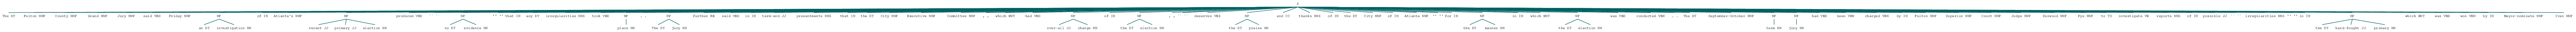

In [ ]:
display(tree)

##Part of Speech Tagging with spaCy

POS tagging is one of several linguistic annotations spaCy generates to support analysis of texts' grammatical structure. Here we'll print the part of speech corresponding to each word in a sample sentence. 

In [ ]:
#Load nlp model and create doc object (contains original text tokens and results from nlp processing)
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

#Print part of speech tags for each word in doc
for token in doc:
    print(token.text, token.pos_)

Apple PROPN
is AUX
looking VERB
at ADP
buying VERB
U.K. PROPN
startup NOUN
for ADP
$ SYM
1 NUM
billion NUM


spaCy also generates "fine-grained" POS tags through the ".tag_" attribute and explanation for each feature.

In [ ]:
#Print POS tags, fine-grained part of speech tags and explanation for each feature, separated by spaces for improved readability
for token in doc:
    print(f'{token.text:{12}} {token.pos_:{10}} {token.tag_:{8}} {spacy.explain(token.tag_)}')

Apple        PROPN      NNP      noun, proper singular
is           AUX        VBZ      verb, 3rd person singular present
looking      VERB       VBG      verb, gerund or present participle
at           ADP        IN       conjunction, subordinating or preposition
buying       VERB       VBG      verb, gerund or present participle
U.K.         PROPN      NNP      noun, proper singular
startup      NOUN       NN       noun, singular or mass
for          ADP        IN       conjunction, subordinating or preposition
$            SYM        $        symbol, currency
1            NUM        CD       cardinal number
billion      NUM        CD       cardinal number


Similar to NLTK, parts of speech and the grammatical relationships between words can be visualized in spaCy using the displaCy visualizer. 

In [ ]:
#Create dependency visualizer
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

You can also use the POS tagger to clean a text of any unrecognized words like "etc" and "i.e." since those labeled with the POS tag "X." Below, all words tagged as "X" are identified and then removed.

In [ ]:
# Raw text document
raw_text="""Apple, an American multinational technology company that specializes in consumer electronics, software, online services, etc. is looking at buying U.K. startup for $1 billion i.e. a very good indicator of the company's value"""

# Creating a spacy object
raw_doc=nlp(raw_text)

# Checking if POS tag is X and printing them
print('The junk values are..')
for token in raw_doc:
  if token.pos_=='X':
    print(token.text)

print('After removing junk')
# Removing the tokens whose POS tag is junk.
clean_doc=[token for token in raw_doc if not token.pos_=='X']
print(clean_doc)

The junk values are..
etc
i.e.
After removing junk
[Apple, ,, an, American, multinational, technology, company, that, specializes, in, consumer, electronics, ,, software, ,, online, services, ,, ., is, looking, at, buying, U.K., startup, for, $, 1, billion, a, very, good, indicator, of, the, company, 's, value]


You can also look for instances of specific POS tags or patterns of tags (along with other linguistic attributes) using the Matcher.

In [ ]:
# Initialize the Matcher with the shared vocabulary
matcher = Matcher(nlp.vocab)

# Write a pattern that matches a form of "buy" plus proper noun
pattern = [{"LEMMA": 'buy'}, {"POS": 'PROPN'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("NEW_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)


Total matches found: 1
Match found: buying U.K.


##Part of Speech Tagging and Visualization with PosTagVisualizer

The POS visualizer creates a bar chart to visualize the relative proportions of different parts-of-speech in a corpus. It works with corpora tagged by either via NLTK or spaCy. [Learn more here. ](https://www.scikit-yb.org/en/latest/api/text/postag.html)

First, let's visualize the condensed news text from the Brown corpus defined above. The PosTagVisualizer can be used with untagged text by using the "parse" keyword and specifying NLTK as the dictionary of use.

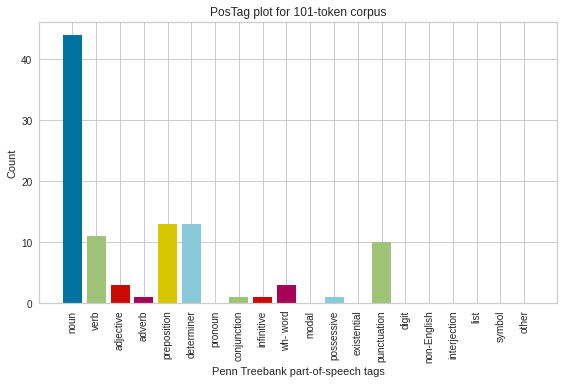

In [ ]:
# Create the visualizer, fit, score, and show it
viz = PosTagVisualizer(parser='nltk')
viz.fit(news_text_condensed)
viz.show()

We can also tag and visualize text using the universal dependency tsgs from spaCy by specifying spaCy as the parsing dictionary. 

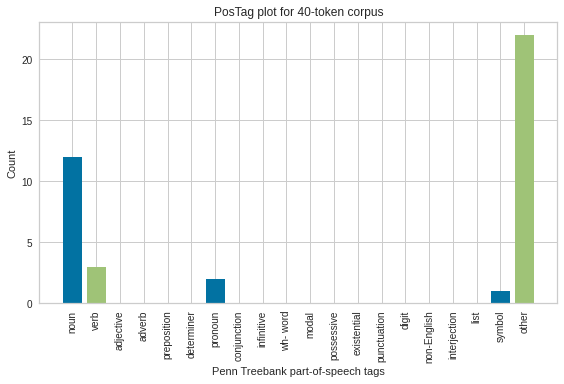

In [ ]:
untagged_speech = "Apple, an American multinational technology company that specializes in consumer electronics, software, online services, etc. is looking at buying U.K. startup for $1 billion i.e. a very good indicator of the company's value"

viz = PosTagVisualizer(parser='spacy')
viz.fit(untagged_speech)
viz.show()

PosTagVisualizer also works with texts already tagged by NLTK or spaCy. Here's an example of text tagged via NLTK.

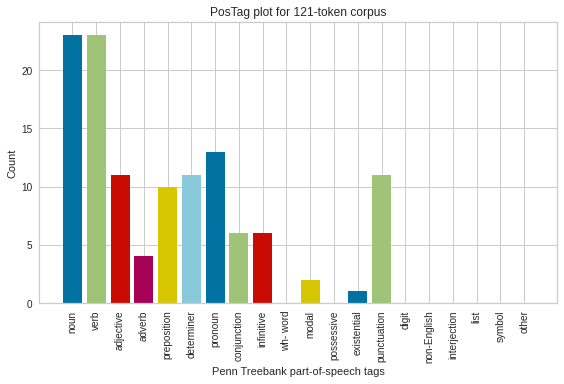

In [ ]:
#Load text for visualization (already tagged through NLTK)
tagged_stanzas = [
    [
        [
            ('Whose', 'JJ'),('woods', 'NNS'),('these', 'DT'),
            ('are', 'VBP'),('I', 'PRP'),('think', 'VBP'),('I', 'PRP'),
            ('know', 'VBP'),('.', '.')
            ],
        [
            ('His', 'PRP$'),('house', 'NN'),('is', 'VBZ'),('in', 'IN'),
            ('the', 'DT'),('village', 'NN'),('though', 'IN'),(';', ':'),
            ('He', 'PRP'),('will', 'MD'),('not', 'RB'),('see', 'VB'),
            ('me', 'PRP'),('stopping', 'VBG'), ('here', 'RB'),('To', 'TO'),
            ('watch', 'VB'),('his', 'PRP$'),('woods', 'NNS'),('fill', 'VB'),
            ('up', 'RP'),('with', 'IN'),('snow', 'NNS'),('.', '.')
            ]
        ],
    [
        [
            ('My', 'PRP$'),('little', 'JJ'),('horse', 'NN'),('must', 'MD'),
            ('think', 'VB'),('it', 'PRP'),('queer', 'JJR'),('To', 'TO'),
            ('stop', 'VB'),('without', 'IN'),('a', 'DT'),('farmhouse', 'NN'),
            ('near', 'IN'),('Between', 'NNP'),('the', 'DT'),('woods', 'NNS'),
            ('and', 'CC'),('frozen', 'JJ'),('lake', 'VB'),('The', 'DT'),
            ('darkest', 'JJS'),('evening', 'NN'),('of', 'IN'),('the', 'DT'),
            ('year', 'NN'),('.', '.')
            ]
        ],
    [
        [
            ('He', 'PRP'),('gives', 'VBZ'),('his', 'PRP$'),('harness', 'NN'),
            ('bells', 'VBZ'),('a', 'DT'),('shake', 'NN'),('To', 'TO'),
            ('ask', 'VB'),('if', 'IN'),('there', 'EX'),('is', 'VBZ'),
            ('some', 'DT'),('mistake', 'NN'),('.', '.')
            ],
        [
            ('The', 'DT'),('only', 'JJ'),('other', 'JJ'),('sound', 'NN'),
            ('’', 'NNP'),('s', 'VBZ'),('the', 'DT'),('sweep', 'NN'),
            ('Of', 'IN'),('easy', 'JJ'),('wind', 'NN'),('and', 'CC'),
            ('downy', 'JJ'),('flake', 'NN'),('.', '.')
            ]
        ],
    [
        [
            ('The', 'DT'),('woods', 'NNS'),('are', 'VBP'),('lovely', 'RB'),
            (',', ','),('dark', 'JJ'),('and', 'CC'),('deep', 'JJ'),(',', ','),
            ('But', 'CC'),('I', 'PRP'),('have', 'VBP'),('promises', 'NNS'),
            ('to', 'TO'),('keep', 'VB'),(',', ','),('And', 'CC'),('miles', 'NNS'),
            ('to', 'TO'),('go', 'VB'),('before', 'IN'),('I', 'PRP'),
            ('sleep', 'VBP'),(',', ','),('And', 'CC'),('miles', 'NNS'),
            ('to', 'TO'),('go', 'VB'),('before', 'IN'),('I', 'PRP'),
            ('sleep', 'VBP'),('.', '.')
            ]
    ]
]

# Create the visualizer, fit, score, and show it
viz = PosTagVisualizer()
viz.fit(tagged_stanzas)
viz.show()

In [ ]:
##DOES NOT WORK
#Get news text from Brown corpus
news_text = brown.words(categories='news')
brown_pos = nltk.pos_tag(news_text)
print(brown_pos[:10])


[('The', 'DT'), ('Fulton', 'NNP'), ('County', 'NNP'), ('Grand', 'NNP'), ('Jury', 'NNP'), ('said', 'VBD'), ('Friday', 'NNP'), ('an', 'DT'), ('investigation', 'NN'), ('of', 'IN')]


In [ ]:
type(tagged_corpus)

NameError: ignored

In [ ]:
# Create the visualizer, fit, score, and show it
viz = PosTagVisualizer()
viz.fit(brown_pos)
viz.show()

ValueError: ignored

The PosTagVisualizer can also be used with text tagged using spaCy's universal dependency framework by specifying the tagset keyword as “universal.”

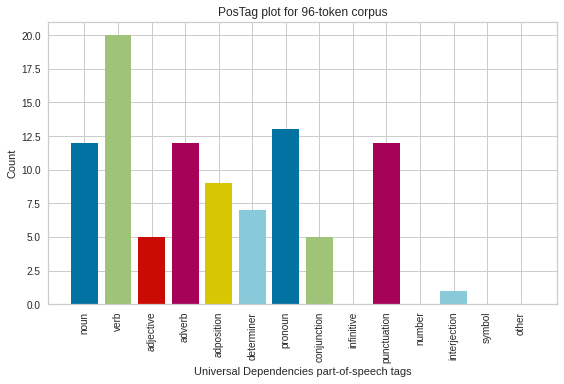

In [ ]:
tagged_speech = [
    [
        [
            ('In', 'ADP'),('all', 'DET'),('honesty', 'NOUN'),(',', 'PUNCT'),
            ('I', 'PRON'),('said', 'VERB'),('yes', 'INTJ'),('to', 'ADP'),
            ('the', 'DET'),('fear', 'NOUN'),('of', 'ADP'),('being', 'VERB'),
            ('on', 'ADP'),('this', 'DET'),('stage', 'NOUN'),('tonight', 'NOUN'),
            ('because', 'ADP'),('I', 'PRON'),('wanted', 'VERB'),('to', 'PART'),
            ('be', 'VERB'),('here', 'ADV'),(',', 'PUNCT'),('to', 'PART'),
            ('look', 'VERB'),('out', 'PART'),('into', 'ADP'),('this', 'DET'),
            ('audience', 'NOUN'),(',', 'PUNCT'),('and', 'CCONJ'),
            ('witness', 'VERB'),('this', 'DET'),('moment', 'NOUN'),('of', 'ADP'),
            ('change', 'NOUN')
            ],
        [
            ('and', 'CCONJ'),('I', 'PRON'),("'m", 'VERB'),('not', 'ADV'),
            ('fooling', 'VERB'),('myself', 'PRON'),('.', 'PUNCT')
            ],
        [
            ('I', 'PRON'),("'m", 'VERB'),('not', 'ADV'),('fooling', 'VERB'),
            ('myself', 'PRON'),('.', 'PUNCT')
            ],
        [
            ('Next', 'ADJ'),('year', 'NOUN'),('could', 'VERB'),('be', 'VERB'),
            ('different', 'ADJ'),('.', 'PUNCT')
            ],
        [
            ('It', 'PRON'),('probably', 'ADV'),('will', 'VERB'),('be', 'VERB'),
            (',', 'PUNCT'),('but', 'CCONJ'),('right', 'ADV'),('now', 'ADV'),
            ('this', 'DET'),('moment', 'NOUN'),('is', 'VERB'),('real', 'ADJ'),
            ('.', 'PUNCT')
            ],
        [
            ('Trust', 'VERB'),('me', 'PRON'),(',', 'PUNCT'),('it', 'PRON'),
            ('is', 'VERB'),('real', 'ADJ'),('because', 'ADP'),('I', 'PRON'),
            ('see', 'VERB'),('you', 'PRON')
            ],
        [
            ('and', 'CCONJ'), ('I', 'PRON'), ('see', 'VERB'), ('you', 'PRON')
            ],
        [
            ('—', 'PUNCT')
            ],
        [
            ('all', 'ADJ'),('these', 'DET'),('faces', 'NOUN'),('of', 'ADP'),
            ('change', 'NOUN')
            ],
        [
            ('—', 'PUNCT'),('and', 'CCONJ'),('now', 'ADV'),('so', 'ADV'),
            ('will', 'VERB'),('everyone', 'NOUN'),('else', 'ADV'), ('.', 'PUNCT')
            ]
    ]
]

# Create the visualizer, fit, score, and show it
viz = PosTagVisualizer(tagset="universal")
viz.fit(tagged_speech)
viz.show()

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)